In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import requests
from PIL import Image
from io import BytesIO

from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats
from nba_api.stats.static.teams import find_teams_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from nba_api.stats.endpoints.playerdashptshots import PlayerDashPtShots
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
import time
from PIL import Image
from collections import defaultdict

In [2]:
import time, tqdm
from adjustText import adjust_text

In [3]:
plt.style.use('fivethirtyeight')

In [5]:
jrue_id = find_players_by_full_name("Jrue Holiday")[0]['id']

In [7]:
player_shots = PlayerDashPtShots(team_id=0, player_id=jrue_id, season='2021-22', per_mode_simple='PerGame')

In [9]:
player_shots.get_data_frames()[1]

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,SORT_ORDER,GP,G,SHOT_TYPE,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,201950,"Holiday, Jrue",1,47,35,Catch and Shoot,0.096,26,64,0.406,0.609,0.001,0,1,0.000,0.094,26,63,0.413
1,201950,"Holiday, Jrue",2,47,47,Pull Ups,0.415,131,277,0.473,0.583,0.190,70,127,0.551,0.225,61,150,0.407
2,201950,"Holiday, Jrue",3,47,47,Less than 10 ft,0.487,181,325,0.557,0.557,0.487,181,325,0.557,0.000,0,0,NaN
3,201950,"Holiday, Jrue",4,47,1,Other,0.001,0,1,0.000,0.000,0.000,0,0,NaN,0.001,0,1,0.000


In [11]:
league_stats = LeagueDashPtStats(per_mode_simple='Totals', pt_measure_type='PullUpShot', season='2021-22').get_data_frames()[0]

In [13]:
league_stats.PULL_UP_FGM.sum() / league_stats.PULL_UP_FGA.sum()

0.37403878705808385

In [15]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2013, 2022)]

In [17]:
league_stats

,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GP,W,L,MIN,PULL_UP_FGM,PULL_UP_FGA,PULL_UP_FG_PCT,PULL_UP_PTS,PULL_UP_FG3M,PULL_UP_FG3A,PULL_UP_FG3_PCT,PULL_UP_EFG_PCT
0,1610612737,ATL,Atlanta Hawks,58,28,30,13920.0,631,1598,0.395,1511,249,701,0.355,0.473
1,1610612738,BOS,Boston Celtics,60,34,26,14600.0,467,1276,0.366,1107,173,546,0.317,0.434
2,1610612751,BKN,Brooklyn Nets,59,31,28,14210.0,677,1645,0.412,1578,224,659,0.340,0.480
3,1610612766,CHA,Charlotte Hornets,60,29,31,14575.0,493,1338,0.368,1189,203,617,0.329,0.444
4,1610612741,CHI,Chicago Bulls,59,38,21,14185.0,688,1564,0.440,1516,140,400,0.350,0.485
5,1610612739,CLE,Cleveland Cavaliers,58,35,23,13920.0,427,1109,0.385,1013,159,463,0.343,0.457
6,1610612742,DAL,Dallas Mavericks,59,35,24,14235.0,579,1534,0.377,1338,180,597,0.302,0.436
7,1610612743,DEN,Denver Nuggets,58,33,25,13970.0,427,1149,0.372,1018,164,524,0.313,0.443
8,1610612765,DET,Detroit Pistons,58,13,45,13970.0,369,1156,0.319,848,110,414,0.266,0.367
9,1610612744,GSW,Golden State Warriors,59,42,17,14210.0,466,1256,0.371,1171,239,661,0.362,0.466


In [24]:
jrue_efg_pcts = []
jrue_fgas = []
efg_pcts = []
for season in seasons:
    league_stats = LeagueDashPtStats(per_mode_simple='Totals', pt_measure_type='PullUpShot', season=season).get_data_frames()[0]
    time.sleep(0.75)
    jrue_stats = PlayerDashPtShots(team_id=0, player_id=jrue_id, season=season, per_mode_simple='PerGame').get_data_frames()[1]
    jrue_pullups = jrue_stats.loc[jrue_stats.SHOT_TYPE == 'Pull Ups']
    jrue_efg_pcts.append(jrue_pullups.EFG_PCT.iloc[0])
    jrue_fgas.append(jrue_pullups.FGA.iloc[0])
    time.sleep(0.75)
    efg_pct = (league_stats.PULL_UP_FGM.sum() + 0.5 * league_stats.PULL_UP_FG3M.sum()) / league_stats.PULL_UP_FGA.sum()
    efg_pcts.append(efg_pct)
    

[0.455, 0.444, 0.451, 0.479, 0.459, 0.436, 0.458, 0.567, 0.583]

In [26]:
efg_pcts

[0.4182637390531793,
 0.41804554985778647,
 0.42290779302729137,
 0.43650747764415665,
 0.43873595875590343,
 0.4377332130793853,
 0.4460663139185683,
 0.4571173913914315,
 0.44247231223098127]

In [27]:
scaled_efg_pcts = [item * 100 for item in efg_pcts]
scaled_jrue_efg_pcts = [item * 100 for item in jrue_efg_pcts]

In [35]:
relative_jrue_efg_pcts = [scaled_jrue_efg_pcts[i] - scaled_efg_pcts[i] for i in range(len(scaled_jrue_efg_pcts))]

In [37]:
import matplotlib.ticker as mtick


c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


Text(8, -2, 'Number in circles shows Pull Up FGA per game')

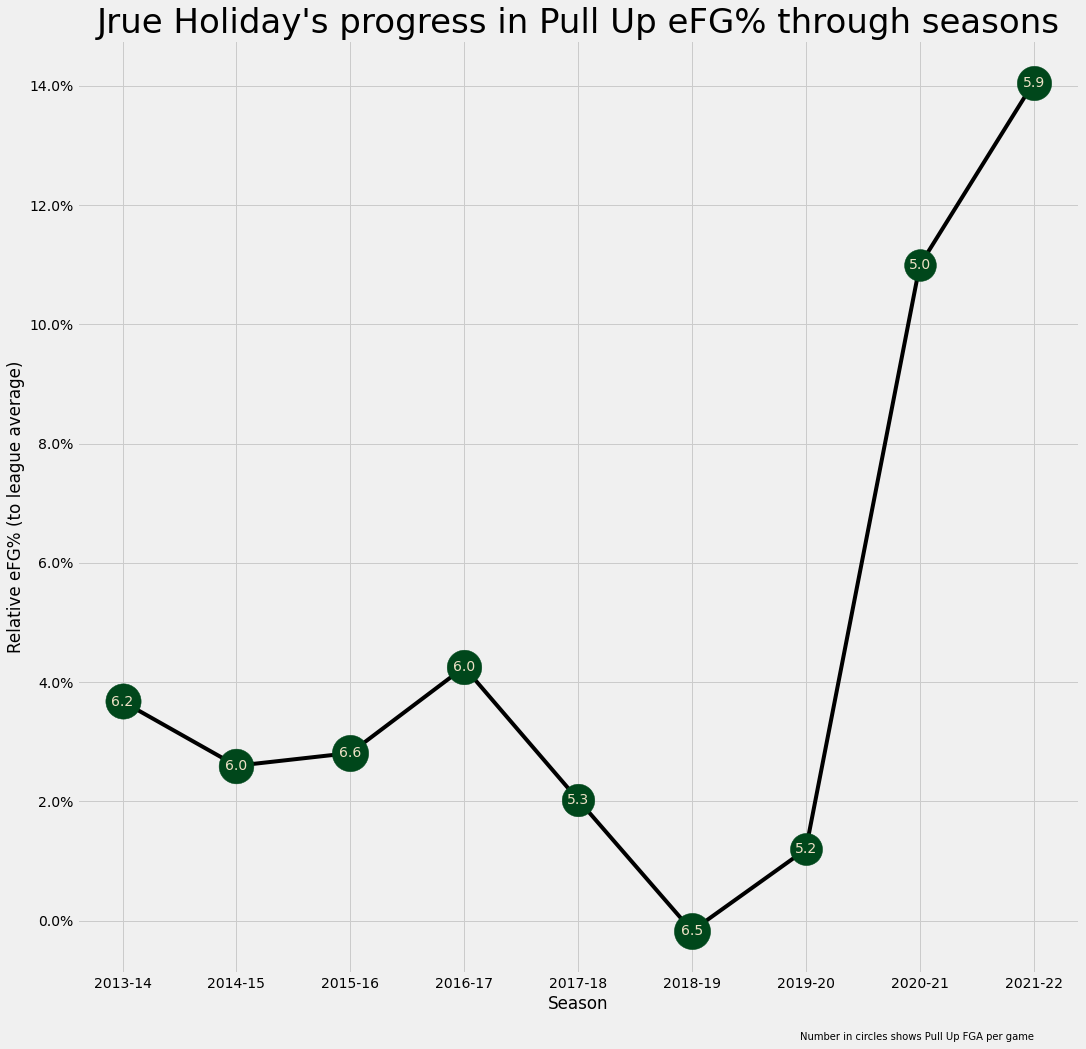

In [49]:
fig, ax = plt.subplots(figsize=(16, 16))

#ax.plot(scaled_efg_pcts, lw=2, color='black')
ax.plot(relative_jrue_efg_pcts, color='black')
ax.set_xticklabels([""] + seasons)

ax.set_title("Jrue Holiday's progress in Pull Up eFG% through seasons", size=34)
ax.set_ylabel("Relative eFG% (to league average)")
ax.set_xlabel("Season")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(len(jrue_fgas)):
    ax.scatter(i, relative_jrue_efg_pcts[i], s=200*jrue_fgas[i], color='#00471B', zorder=4)
    ax.text(x=i, y=relative_jrue_efg_pcts[i], s=f"{jrue_fgas[i]:.1f}", ha='center', va='center', color='#EEE1C6', zorder=5)
ax.text(x=8, y=-2, s='Number in circles shows Pull Up FGA per game', ha='right', size=10)